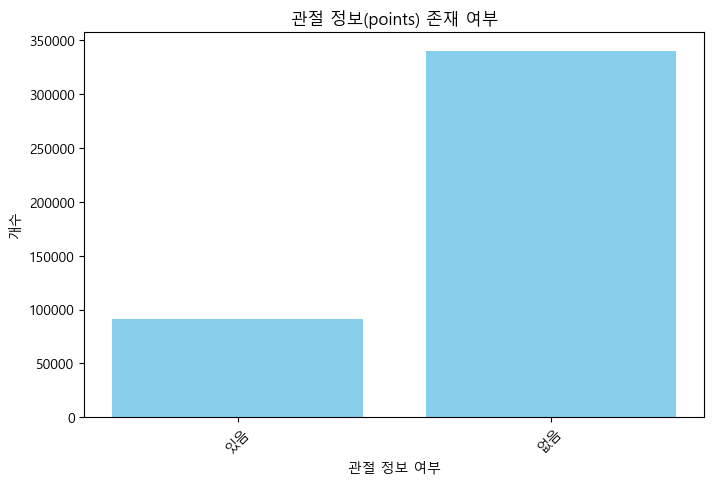

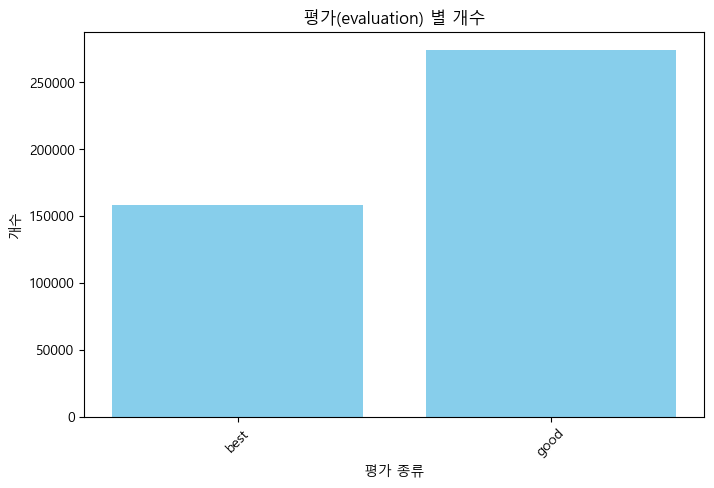

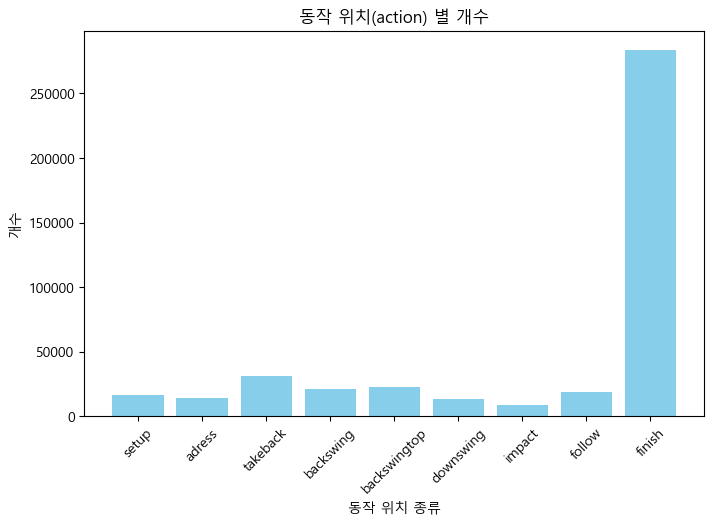

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# 한글 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 분석할 루트 폴더 경로
root_dir = r"D:\golfDataset\스포츠 사람 동작 영상(골프)\Training\Public"

# 데이터 수집을 위한 변수
points_count = {"있음": 0, "없음": 0}
evaluation_count = defaultdict(int)
action_count = defaultdict(int)

# JSON 파일을 찾아 분석
for dirpath, _, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith(".json"):  # JSON 파일만 분석
            file_path = os.path.join(dirpath, filename)
            with open(file_path, "r", encoding="utf-8") as f:
                data = json.load(f)
                
                # 관절 정보(points) 존재 여부 확인
                has_points = any(ann.get("points") for ann in data.get("annotations", []))
                if has_points:
                    points_count["있음"] += 1
                else:
                    points_count["없음"] += 1
                
                # 평가(evaluation) 개수 카운트
                evaluation = data.get("image", {}).get("evaluation")
                if evaluation:
                    evaluation_count[evaluation] += 1
                
                # 동작(action) 개수 카운트
                action = data.get("image", {}).get("action")
                if action:
                    action_count[action] += 1

# 시각화 함수
def plot_bar_chart(data_dict, title, xlabel):
    plt.figure(figsize=(8, 5))
    plt.bar(data_dict.keys(), data_dict.values(), color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel("개수")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# 시각화 실행
plot_bar_chart(points_count, "관절 정보(points) 존재 여부", "관절 정보 여부")
plot_bar_chart(evaluation_count, "평가(evaluation) 별 개수", "평가 종류")
plot_bar_chart(action_count, "동작 위치(action) 별 개수", "동작 위치 종류")


# 여러가지 추가 분석

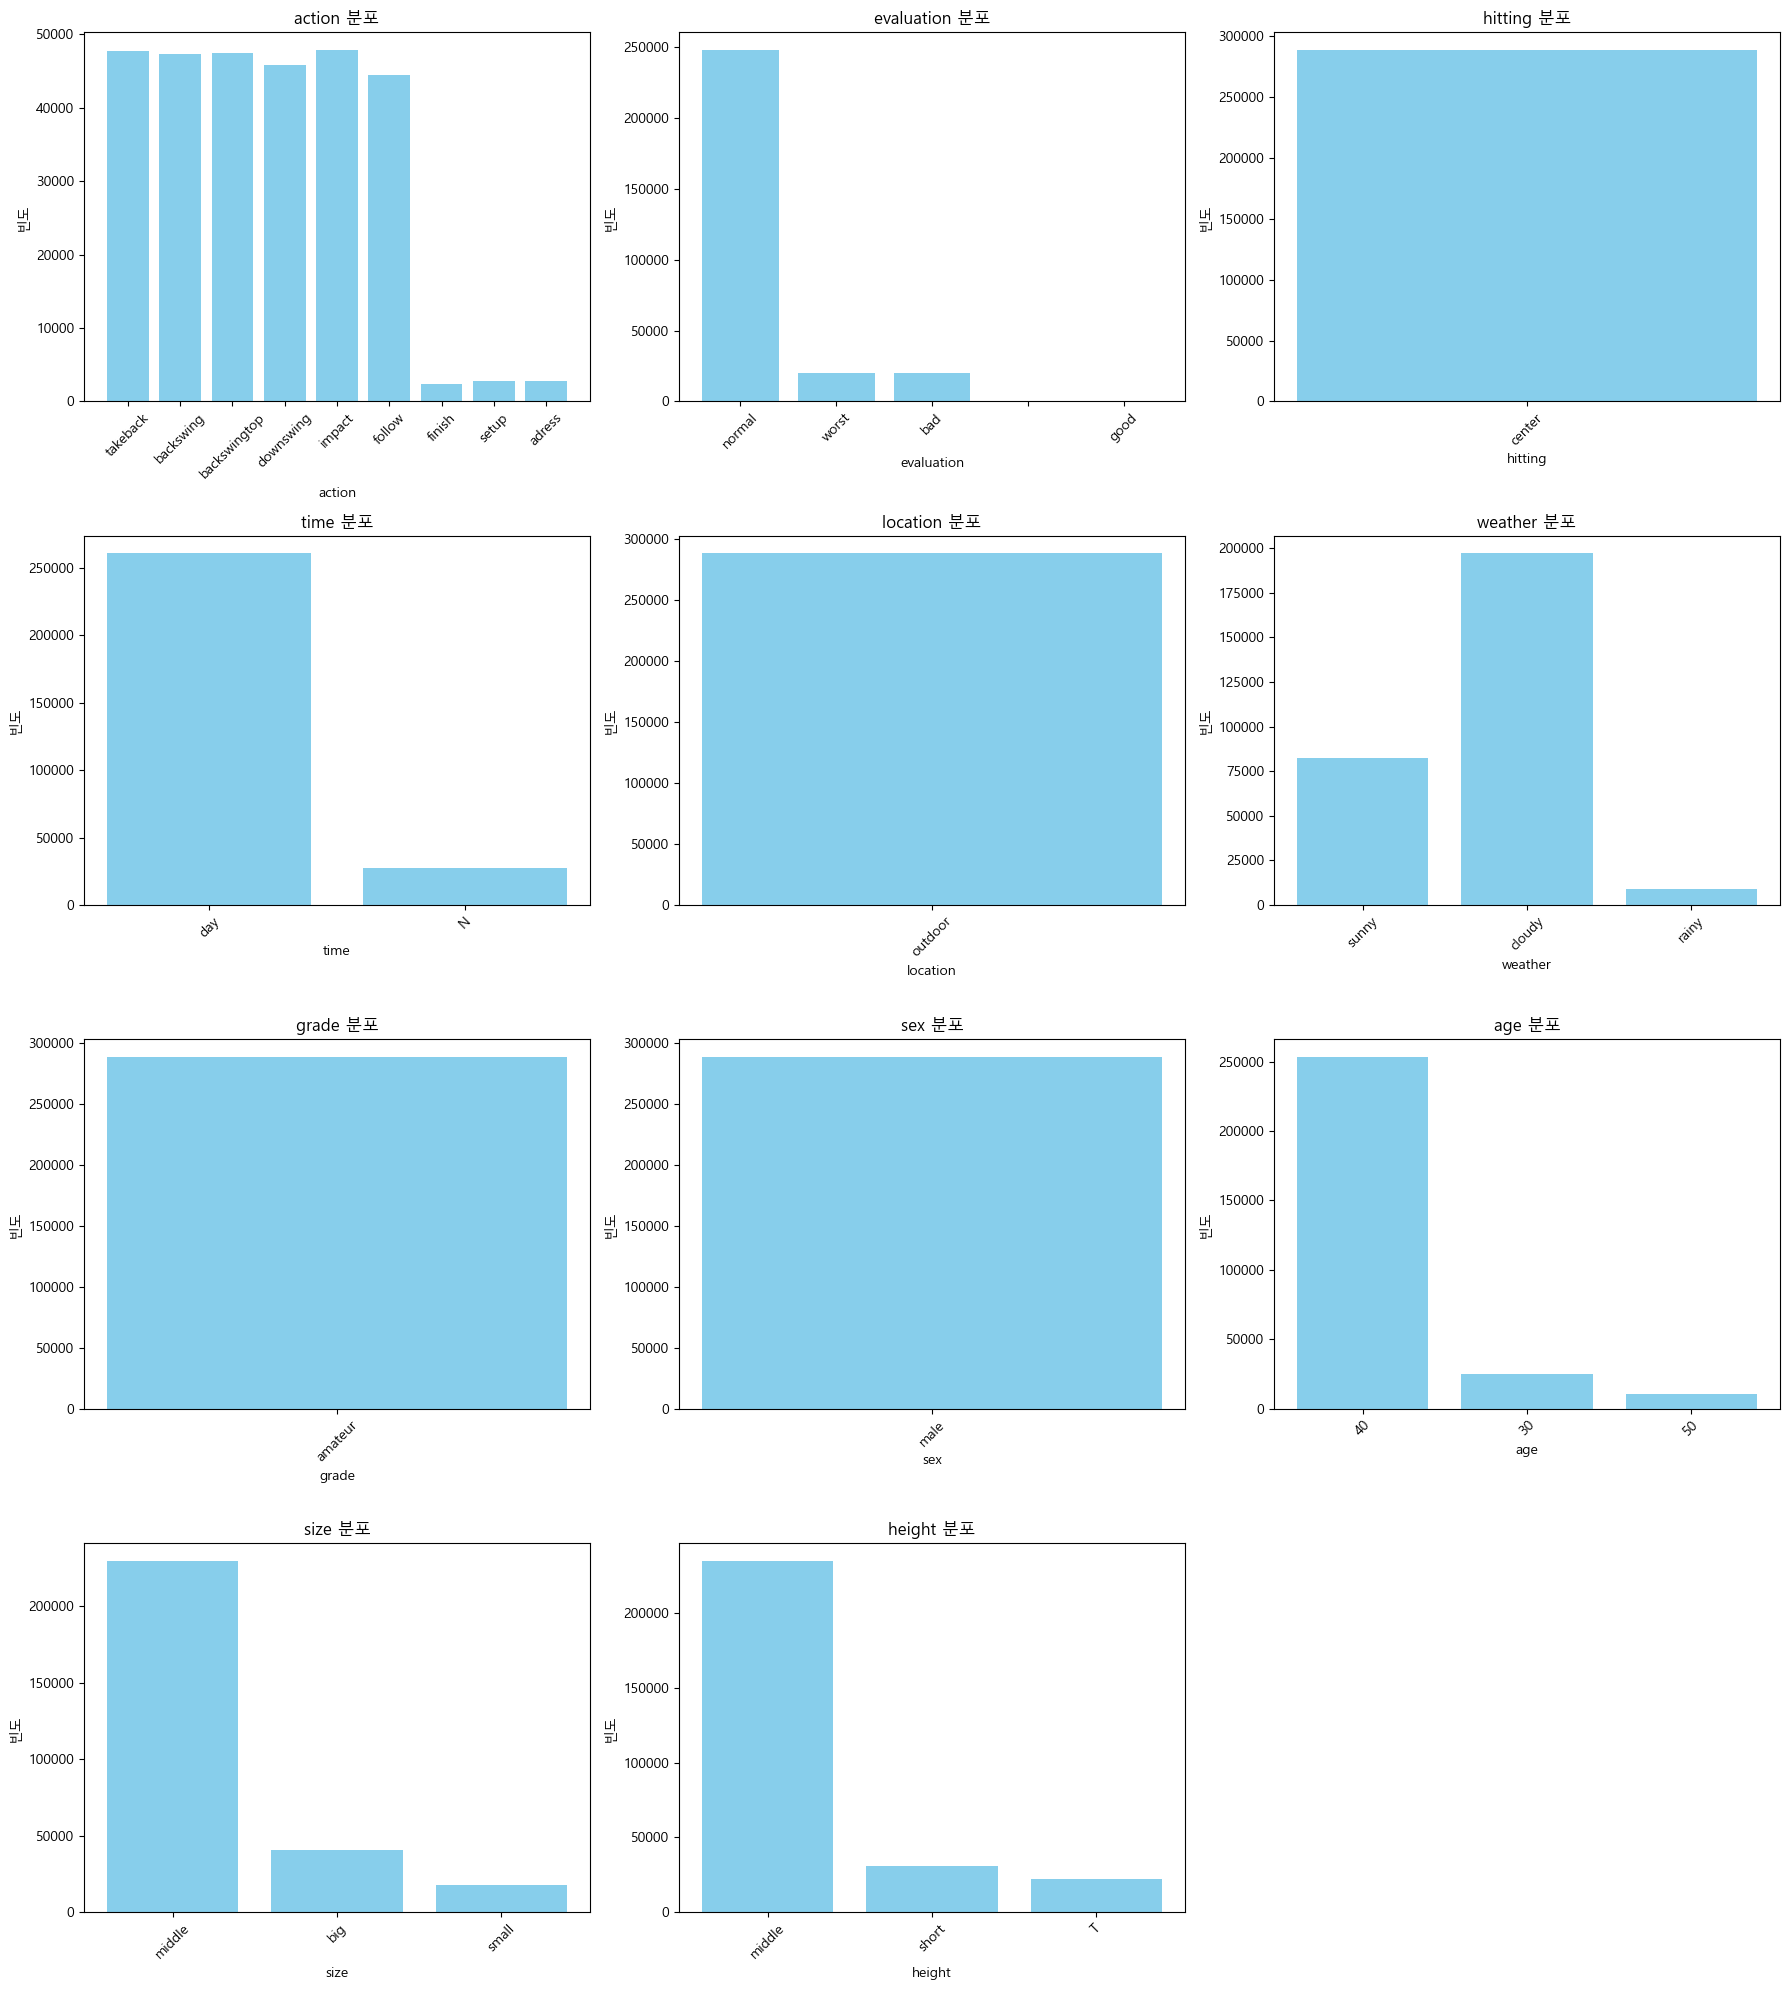

In [1]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import font_manager, rc

# ✔ 한글 폰트 설정 (Windows 기준 - 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

# 데이터 경로
base_dir = r'D:\golfDataset\스포츠 사람 동작 영상(골프)\Training\Public\male'

# 추출할 메타데이터 필드
meta_fields = {
    "image": ["action", "evaluation", "hitting"],
    "environment": ["time", "location", "weather"],
    "actor": ["grade", "sex", "age", "size", "height"]
}

# 카운트 저장 구조
meta_counts = defaultdict(lambda: defaultdict(int))

# 모든 JSON 파일 탐색
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".json"):
            json_path = os.path.join(root, file)
            with open(json_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                for section, keys in meta_fields.items():
                    for key in keys:
                        try:
                            value = data[section][key]
                            meta_counts[key][value] += 1
                        except KeyError:
                            continue

# 시각화
num_fields = len(meta_counts)
cols = 3
rows = (num_fields + cols - 1) // cols
plt.figure(figsize=(18, 5 * rows))

for i, (key, value_dict) in enumerate(meta_counts.items(), 1):
    plt.subplot(rows, cols, i)
    plt.bar(value_dict.keys(), value_dict.values(), color='skyblue')
    plt.title(f'{key} 분포')  # 한글 타이틀
    plt.xlabel(key)
    plt.ylabel('빈도')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
